In [2]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [19]:
path = "/Users/phuonglh/vlp/vcb/dat/HOSE_2008_2022_vnstock.csv"

In [20]:
df = pd.read_csv(path, parse_dates=["TradingDate"])

In [21]:
df

,Id,Open,High,Low,Close,Volume,TradingDate,Stock
0,0,8552.0,8552.0,8552.0,8552.0,5380.0,2009-09-24,AAM
1,1,8965.0,8965.0,8965.0,8965.0,12090.0,2009-09-25,AAM
2,2,9377.0,9377.0,9377.0,9377.0,9150.0,2009-09-28,AAM
3,3,9846.0,9846.0,9846.0,9846.0,11530.0,2009-09-29,AAM
4,4,10315.0,10315.0,10315.0,10315.0,29680.0,2009-09-30,AAM
...,...,...,...,...,...,...,...,...
828791,3736,7430.0,7440.0,7150.0,7200.0,98212.0,2022-12-26,VTO
828792,3737,7160.0,7300.0,7150.0,7200.0,86405.0,2022-12-27,VTO
828793,3738,7200.0,7460.0,7200.0,7420.0,127829.0,2022-12-28,VTO
828794,3739,7410.0,7430.0,7320.0,7420.0,36470.0,2022-12-29,VTO


In [28]:
fpt = df[df['Stock'] == 'FPT'].drop(labels='Id', axis=1)

In [29]:
fpt

,Open,High,Low,Close,Volume,TradingDate,Stock
229087,13142.0,13201.0,13023.0,13023.0,113410.0,2008-01-02,FPT
229088,12845.0,12904.0,12785.0,12785.0,211160.0,2008-01-03,FPT
229089,12607.0,12666.0,12547.0,12607.0,180890.0,2008-01-04,FPT
229090,12488.0,12488.0,12190.0,12250.0,232200.0,2008-01-07,FPT
229091,12428.0,12428.0,12369.0,12369.0,214660.0,2008-01-08,FPT
...,...,...,...,...,...,...,...
232823,77700.0,78100.0,76400.0,76400.0,833640.0,2022-12-26,FPT
232824,76400.0,77500.0,76000.0,76500.0,806989.0,2022-12-27,FPT
232825,77000.0,77000.0,76000.0,76700.0,590282.0,2022-12-28,FPT
232826,76500.0,77000.0,76200.0,76200.0,656647.0,2022-12-29,FPT


In [286]:
train, valid, test = TSDataset.from_pandas(fpt, dt_col="TradingDate", target_col="Close", extra_feature_col=['Open', 'High', 'Low', 'Close', 'Volume'], with_split=True, val_ratio=0.1, test_ratio=0.1)

,Open,High,Low,Close,Volume,TradingDate,Stock,id
229087,13142.0,13201.0,13023.0,13023.0,113410.0,2008-01-02,FPT,0
229088,12845.0,12904.0,12785.0,12785.0,211160.0,2008-01-03,FPT,0
229089,12607.0,12666.0,12547.0,12607.0,180890.0,2008-01-04,FPT,0
229090,12488.0,12488.0,12190.0,12250.0,232200.0,2008-01-07,FPT,0
229091,12428.0,12428.0,12369.0,12369.0,214660.0,2008-01-08,FPT,0
...,...,...,...,...,...,...,...,...
232075,33584.0,34223.0,33467.0,34049.0,2881060.0,2019-12-30,FPT,0
232076,34049.0,34107.0,33700.0,33874.0,689030.0,2019-12-31,FPT,0
232077,33874.0,34281.0,33700.0,34049.0,896720.0,2020-01-02,FPT,0
232078,34223.0,34339.0,33351.0,33467.0,2047880.0,2020-01-03,FPT,0


In [287]:
valid.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id
232080,33293.0,33758.0,33119.0,33758.0,837240.0,2020-01-07,FPT,0
232081,33409.0,33526.0,33003.0,33003.0,1814290.0,2020-01-08,FPT,0
232082,33293.0,33526.0,33177.0,33467.0,967050.0,2020-01-09,FPT,0
232083,33409.0,33584.0,33177.0,33409.0,1018650.0,2020-01-10,FPT,0
232084,33351.0,33467.0,33119.0,33177.0,786760.0,2020-01-13,FPT,0
...,...,...,...,...,...,...,...,...
232449,71161.0,71807.0,71080.0,71807.0,1700100.0,2021-07-01,FPT,0
232450,72130.0,74715.0,71807.0,74231.0,3873500.0,2021-07-02,FPT,0
232451,76169.0,76735.0,73504.0,74877.0,2934200.0,2021-07-05,FPT,0
232452,74715.0,75119.0,70273.0,70273.0,2640500.0,2021-07-06,FPT,0


In [288]:
test.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id
232454,73019.0,73100.0,71888.0,72534.0,2375400.0,2021-07-08,FPT,0
232455,72373.0,74311.0,71727.0,72454.0,2947000.0,2021-07-09,FPT,0
232456,71727.0,72454.0,67526.0,69546.0,6764400.0,2021-07-12,FPT,0
232457,70192.0,70515.0,68657.0,70273.0,2207400.0,2021-07-13,FPT,0
232458,70757.0,70757.0,68415.0,68819.0,2433500.0,2021-07-14,FPT,0
...,...,...,...,...,...,...,...,...
232823,77700.0,78100.0,76400.0,76400.0,833640.0,2022-12-26,FPT,0
232824,76400.0,77500.0,76000.0,76500.0,806989.0,2022-12-27,FPT,0
232825,77000.0,77000.0,76000.0,76700.0,590282.0,2022-12-28,FPT,0
232826,76500.0,77000.0,76200.0,76200.0,656647.0,2022-12-29,FPT,0


In [289]:
lookback, horizon = 15, 5

In [290]:
scaler = StandardScaler()
for data in [train, valid, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [291]:
train.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,0.054930,0.044499,0.055761,0.039085,-0.770613,2008-01-02,FPT,0,-1.599532,-1.773567,-0.009951,-1.751992,-1.655639,-1.596161,0.0
1,0.013642,0.003636,0.022371,0.006000,-0.631388,2008-01-03,FPT,0,-1.484034,-1.764003,0.699207,-1.751992,-1.655639,-1.596161,0.0
2,-0.019444,-0.029109,-0.011020,-0.018745,-0.674501,2008-01-04,FPT,0,-1.368536,-1.754439,1.408366,-1.751992,-1.655639,-1.596161,0.0
3,-0.035986,-0.053600,-0.061105,-0.068372,-0.601420,2008-01-07,FPT,0,-1.022041,-1.725748,-1.428269,-1.685084,-1.655639,-1.596161,0.0
4,-0.044327,-0.061855,-0.035992,-0.051830,-0.626403,2008-01-08,FPT,0,-0.906543,-1.716184,-0.719110,-1.685084,-1.655639,-1.596161,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2.896680,2.936811,2.923963,2.961986,3.171359,2019-12-30,FPT,0,1.634417,1.688594,-1.428269,-1.751992,1.561157,1.587362,0.0
2989,2.961322,2.920851,2.956652,2.937658,0.049244,2019-12-31,FPT,0,1.749915,1.698158,-0.719110,-1.751992,1.561157,1.587362,0.0
2990,2.936994,2.944791,2.956652,2.961986,0.345058,2020-01-02,FPT,0,-1.599532,-1.773567,0.699207,-1.751992,-1.655639,1.876773,0.0
2991,2.985510,2.952771,2.907689,2.881080,1.984658,2020-01-03,FPT,0,-1.484034,-1.764003,1.408366,-1.751992,-1.655639,1.876773,0.0


In [292]:
valid.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,2.856226,2.872834,2.875140,2.921533,0.260340,2020-01-07,FPT,0,-1.022041,-1.725748,-0.719110,-1.685084,-1.655639,1.876773,0.0
1,2.872352,2.840915,2.858866,2.816577,1.651955,2020-01-08,FPT,0,-0.906543,-1.716184,-0.009951,-1.685084,-1.655639,1.876773,0.0
2,2.856226,2.840915,2.883277,2.881080,0.445229,2020-01-09,FPT,0,-0.791045,-1.706620,0.699207,-1.685084,-1.655639,1.876773,0.0
3,2.872352,2.848894,2.883277,2.873017,0.518723,2020-01-10,FPT,0,-0.675547,-1.697056,1.408366,-1.685084,-1.655639,1.876773,0.0
4,2.864289,2.832797,2.875140,2.840766,0.188441,2020-01-13,FPT,0,-0.329052,-1.668364,-1.428269,-1.618175,-1.655639,1.876773,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,8.120456,8.107808,8.200899,8.210862,1.489314,2021-07-01,FPT,0,-1.715030,-0.052051,0.699207,-0.079271,0.098977,2.166184,0.0
370,8.255162,8.507905,8.302894,8.547831,4.584894,2021-07-02,FPT,0,-1.599532,-0.042487,1.408366,-0.079271,0.098977,2.166184,0.0
371,8.816644,8.785827,8.540975,8.637634,3.247046,2021-07-05,FPT,0,-1.253037,-0.013795,-1.428269,-0.012362,0.098977,2.166184,0.0
372,8.614516,8.563489,8.087680,7.997615,2.828729,2021-07-06,FPT,0,-1.137539,-0.004231,-0.719110,-0.012362,0.098977,2.166184,0.0


In [293]:
test.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,8.378746,8.285705,8.314258,8.311925,2.451146,2021-07-08,FPT,0,-0.906543,0.014897,0.699207,-0.012362,0.098977,2.166184,0.0
1,8.288942,8.452320,8.291670,8.300804,3.265278,2021-07-09,FPT,0,-0.791045,0.024461,1.408366,-0.012362,0.098977,2.166184,0.0
2,8.199139,8.196825,7.702289,7.896552,8.702412,2021-07-12,FPT,0,-0.444550,0.053153,-1.428269,0.054546,0.098977,2.166184,0.0
3,7.985750,7.930048,7.860963,7.997615,2.211863,2021-07-13,FPT,0,-0.329052,0.062717,-0.719110,0.054546,0.098977,2.166184,0.0
4,8.064294,7.963343,7.827011,7.795490,2.533898,2021-07-14,FPT,0,-0.213554,0.072281,-0.009951,0.054546,0.098977,2.166184,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,9.029477,8.973630,8.947271,8.849352,0.255212,2022-12-26,FPT,0,1.172424,1.650338,-1.428269,1.660359,1.561157,2.455595,0.0
370,8.848757,8.891079,8.891153,8.863253,0.217253,2022-12-27,FPT,0,1.287922,1.659902,-0.719110,1.660359,1.561157,2.455595,0.0
371,8.932166,8.822287,8.891153,8.891056,-0.091403,2022-12-28,FPT,0,1.403420,1.669466,-0.009951,1.660359,1.561157,2.455595,0.0
372,8.862658,8.822287,8.919212,8.821549,0.003121,2022-12-29,FPT,0,1.518919,1.679030,0.699207,1.660359,1.561157,2.455595,0.0


In [294]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster

In [295]:
X, y = train.to_numpy()

In [164]:
X.shape, y.shape

((2974, 15, 34), (2974, 5, 1))

In [296]:
tcn = TCNForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], seed=1)                           

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [297]:
model = tcn.fit((X, y), epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 5.1 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
5.1 K     Trainable params
0         Non-trainable params
5.1 K     Total params
0.021     Total estimated model params size (MB)


Epoch 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:01<00:00, 53.00it/s, loss=0.0031]


In [298]:
X_test, y_test = test.to_numpy()

In [299]:
prediction = tcn.predict(X_test)

In [306]:
p, t = test.unscale_numpy(prediction), test.unscale_numpy(y_test)

In [301]:
import matplotlib.pyplot as plt

In [303]:
p.shape

(355, 5, 1)

In [307]:
p[:,:,0][:,-1]

array([74171.15625  , 75302.40625  , 75734.71875  , 77019.5625   ,
       77113.46875  , 76918.34375  , 77728.640625 , 77791.265625 ,
       78569.625    , 78789.65625  , 77677.359375 , 75850.6875   ,
       76823.890625 , 77199.59375  , 76588.6015625, 76733.4765625,
       77104.328125 , 75804.234375 , 74325.8515625, 75041.59375  ,
       74955.9375   , 74587.875    , 75131.4765625, 75173.5546875,
       75399.375    , 75544.765625 , 77557.578125 , 76402.546875 ,
       76128.046875 , 76163.5703125, 76421.125    , 76002.84375  ,
       76633.2890625, 76864.109375 , 77326.9609375, 78170.0859375,
       77130.5390625, 76435.15625  , 76144.734375 , 76071.171875 ,
       75735.7421875, 75252.9453125, 75982.359375 , 76125.046875 ,
       75942.28125  , 75930.328125 , 77311.171875 , 77159.2890625,
       77146.421875 , 77079.1953125, 80764.859375 , 80949.265625 ,
       80789.75     , 81042.515625 , 80541.359375 , 80485.625    ,
       80606.84375  , 80211.46875  , 79449.40625  , 78798.625 

Text(0.5, 1.0, 'FPT on the Test Dataset')

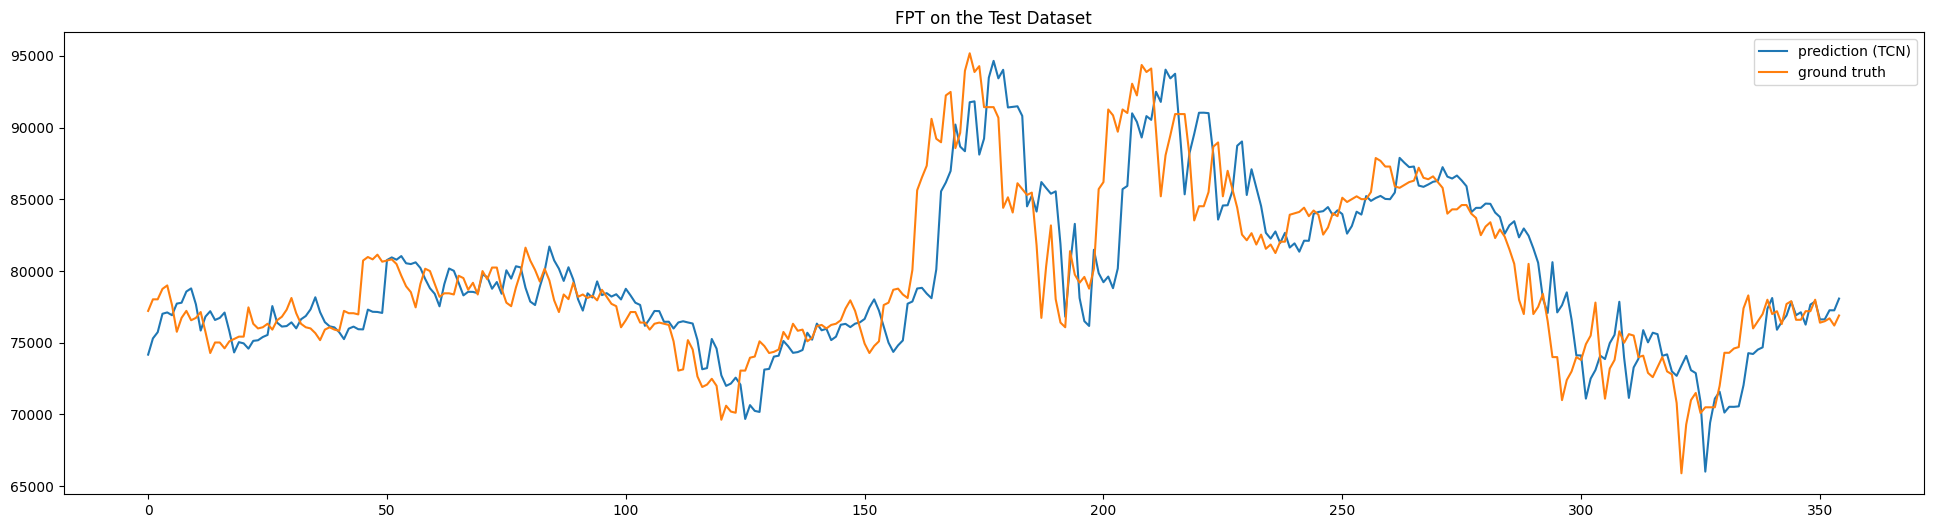

In [308]:
plt.figure(figsize=(24,6))
plt.plot(p[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["prediction (TCN)", "ground truth"])
plt.title('FPT on the Test Dataset')

In [311]:
# from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster

In [312]:
# y

In [177]:
# LSTMForecaster only support 1-step prediction
# lstm = LSTMForecaster(past_seq_len=lookback, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], hidden_dim=32, layer_num=2, optimizer='Adam', loss='mse', lr=1e-3)

In [178]:
# lstm.fit((X, y), epochs=5)

In [179]:
# lstm.evaluate((X, y))

In [313]:
from bigdl.chronos.forecaster.seq2seq_forecaster import Seq2SeqForecaster

In [315]:
seq2seq = Seq2SeqForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], lstm_hidden_dim=64, lstm_layer_num=2, 
                            optimizer='Adam', loss='mse', lr=1e-3)

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [316]:
seq2seq.fit((X, y), epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 104 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.416     Total estimated model params size (MB)


Epoch 4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:02<00:00, 35.98it/s, loss=0.00303]


In [317]:
prediction_seq2seq = seq2seq.predict(X_test)

In [318]:
prediction_seq2seq

array([[[8.564726 ],
        [8.561255 ],
        [8.563778 ],
        [8.566693 ],
        [8.56882  ]],

       [[8.723358 ],
        [8.720487 ],
        [8.722763 ],
        [8.725247 ],
        [8.726973 ]],

       [[8.7895975],
        [8.789953 ],
        [8.792598 ],
        [8.794619 ],
        [8.795767 ]],

       ...,

       [[8.965105 ],
        [8.965606 ],
        [8.96856  ],
        [8.970886 ],
        [8.972278 ]],

       [[8.965575 ],
        [8.965871 ],
        [8.968749 ],
        [8.971025 ],
        [8.972376 ]],

       [[9.075608 ],
        [9.077977 ],
        [9.081188 ],
        [9.083265 ],
        [9.084322 ]]], dtype=float32)

In [319]:
p2 = test.unscale_numpy(prediction_seq2seq)

In [320]:
p2

array([[[74352.53125  ],
        [74327.5625   ],
        [74345.7109375],
        [74366.6875   ],
        [74381.984375 ]],

       [[75493.65625  ],
        [75473.       ],
        [75489.375    ],
        [75507.25     ],
        [75519.65625  ]],

       [[75970.15625  ],
        [75972.7109375],
        [75991.734375 ],
        [76006.2734375],
        [76014.53125  ]],

       ...,

       [[77232.671875 ],
        [77236.2734375],
        [77257.53125  ],
        [77274.265625 ],
        [77284.265625 ]],

       [[77236.0546875],
        [77238.1875   ],
        [77258.890625 ],
        [77275.265625 ],
        [77284.9765625]],

       [[78027.578125 ],
        [78044.625    ],
        [78067.71875  ],
        [78082.6640625],
        [78090.265625 ]]])

Text(0.5, 1.0, 'FPT on the Test Dataset')

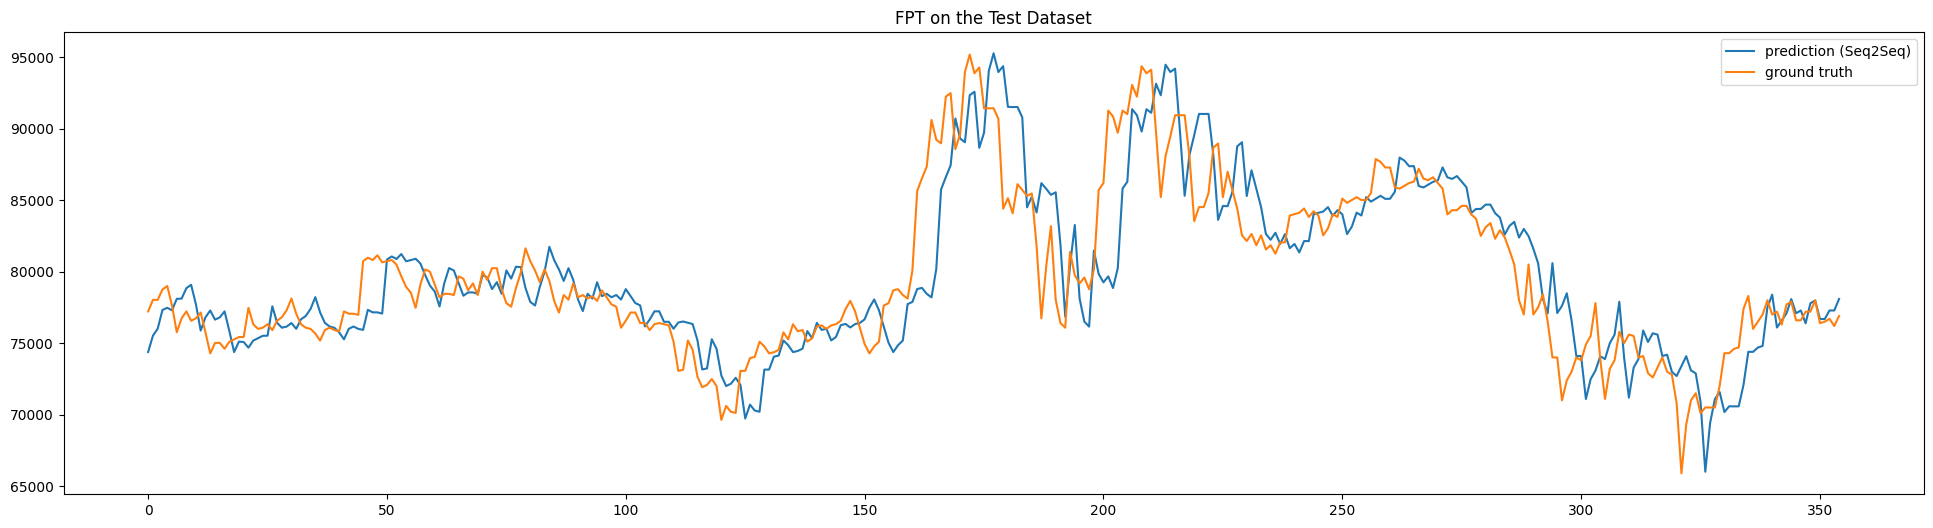

In [321]:
plt.figure(figsize=(24,6))
plt.plot(p2[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["prediction (Seq2Seq)", "ground truth"])
plt.title('FPT on the Test Dataset')

Text(0.5, 1.0, 'FPT on the Test Dataset')

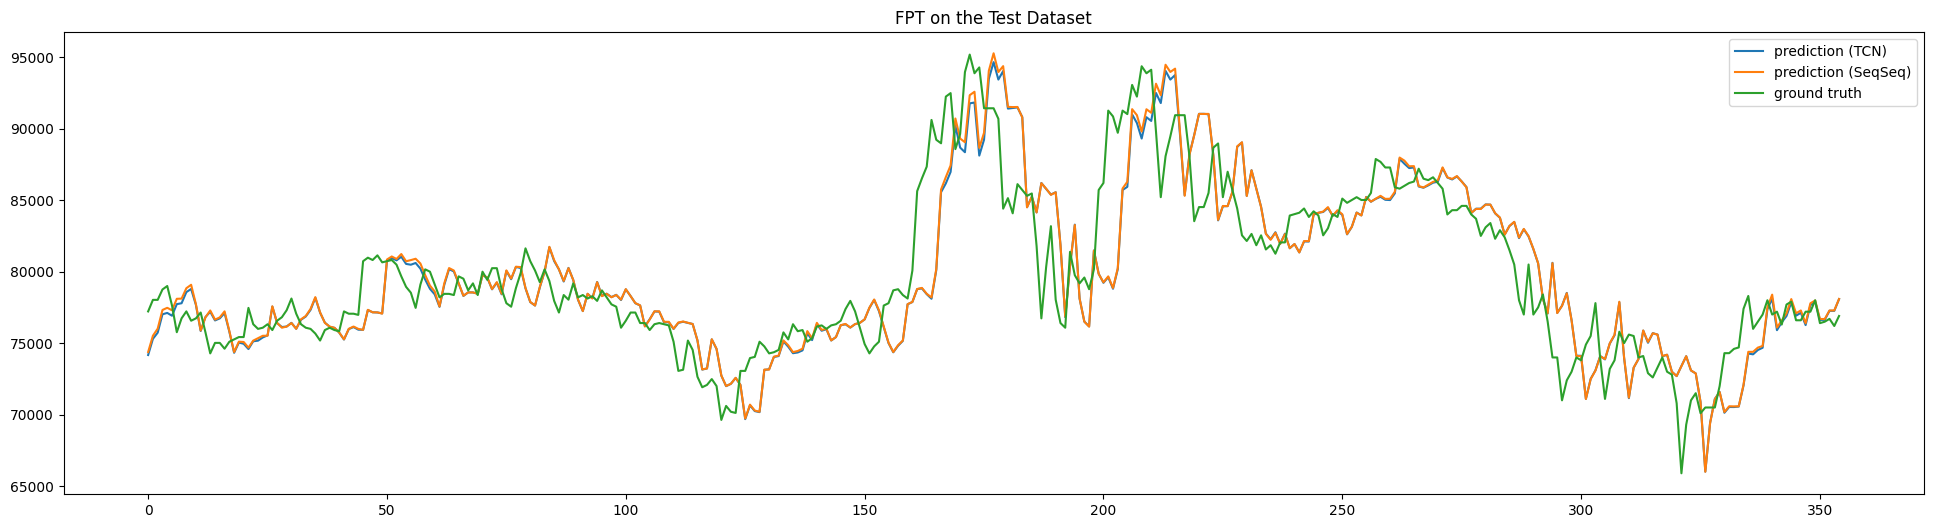

In [322]:
plt.figure(figsize=(24,6))
plt.plot(p[:,:,0][:,-1])
plt.plot(p2[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["prediction (TCN)", "prediction (SeqSeq)", "ground truth"])
plt.title('FPT on the Test Dataset')

In [261]:
train.roll(lookback=lookback, horizon=horizon, time_enc=True, label_len=horizon+2)

In [262]:
U = train.to_numpy()

In [263]:
U[0].shape, U[1].shape, U[2].shape, U[3].shape

((2974, 15, 6), (2974, 12, 1), (2974, 15, 3), (2974, 12, 3))

In [264]:
valid.roll(lookback=lookback, horizon=horizon, time_enc=True, label_len=horizon+2)

In [267]:
V = valid.to_numpy()

In [268]:
V[0].shape, V[1].shape, V[2].shape, V[3].shape

((355, 15, 6), (355, 12, 1), (355, 15, 3), (355, 12, 3))

In [201]:
from bigdl.chronos.forecaster.autoformer_forecaster import AutoformerForecaster

In [250]:
y.shape

(2974, 5, 1)

In [332]:
autoformer = AutoformerForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=U[0].shape[-1], output_feature_num=U[1].shape[-1], freq='d', n_head=4, lr=1E-5)

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [333]:
autoformer.fit(data=U, validation_data=V, epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                 | Params
-------------------------------------------------------
0 | loss          | MSELoss              | 0     
1 | decomp        | series_decomp        | 0     
2 | enc_embedding | DataEmbedding_wo_pos | 2.7 K 
3 | dec_embedding | DataEmbedding_wo_pos | 2.7 K 
4 | encoder       | Encoder              | 263 K 
5 | decoder       | Decoder              | 198 K 
-------------------------------------------------------
467 K     Trainable params
0         Non-trainable params
467 K     Total params
1.869     Total estimated model params size (MB)


Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 0:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 93/105 [00:11<00:01,  7.76it/s, loss=6e+11, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 93/105 [00:11<00:01,  7.77it/s, loss=5.9e+11, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 2:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 93/105 [00:11<00:01,  7.83it/s, loss=5.45e+11, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 3:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 93/105 [00:11<00:01,  7.86it/s, loss=4.99e+11

{'0': {'val_loss': '4154927087616.0'},
 '1': {'val_loss': '3790445477888.0'},
 '2': {'val_loss': '3380318044160.0'},
 '3': {'val_loss': '3152415555584.0'},
 '4': {'val_loss': '3036089155584.0'}}

In [334]:
prediction_autoformer = seq2seq.predict(X_test)

In [335]:
prediction_autoformer

array([[[8.564726 ],
        [8.561255 ],
        [8.563778 ],
        [8.566693 ],
        [8.56882  ]],

       [[8.723358 ],
        [8.720487 ],
        [8.722763 ],
        [8.725247 ],
        [8.726973 ]],

       [[8.7895975],
        [8.789953 ],
        [8.792598 ],
        [8.794619 ],
        [8.795767 ]],

       ...,

       [[8.965105 ],
        [8.965606 ],
        [8.96856  ],
        [8.970886 ],
        [8.972278 ]],

       [[8.965575 ],
        [8.965871 ],
        [8.968749 ],
        [8.971025 ],
        [8.972376 ]],

       [[9.075608 ],
        [9.077977 ],
        [9.081188 ],
        [9.083265 ],
        [9.084322 ]]], dtype=float32)

In [336]:
p3 = test.unscale_numpy(prediction_autoformer)

In [337]:
p3

array([[[74352.53125  ],
        [74327.5625   ],
        [74345.7109375],
        [74366.6875   ],
        [74381.984375 ]],

       [[75493.65625  ],
        [75473.       ],
        [75489.375    ],
        [75507.25     ],
        [75519.65625  ]],

       [[75970.15625  ],
        [75972.7109375],
        [75991.734375 ],
        [76006.2734375],
        [76014.53125  ]],

       ...,

       [[77232.671875 ],
        [77236.2734375],
        [77257.53125  ],
        [77274.265625 ],
        [77284.265625 ]],

       [[77236.0546875],
        [77238.1875   ],
        [77258.890625 ],
        [77275.265625 ],
        [77284.9765625]],

       [[78027.578125 ],
        [78044.625    ],
        [78067.71875  ],
        [78082.6640625],
        [78090.265625 ]]])

Text(0.5, 1.0, 'FPT on the Test Dataset')

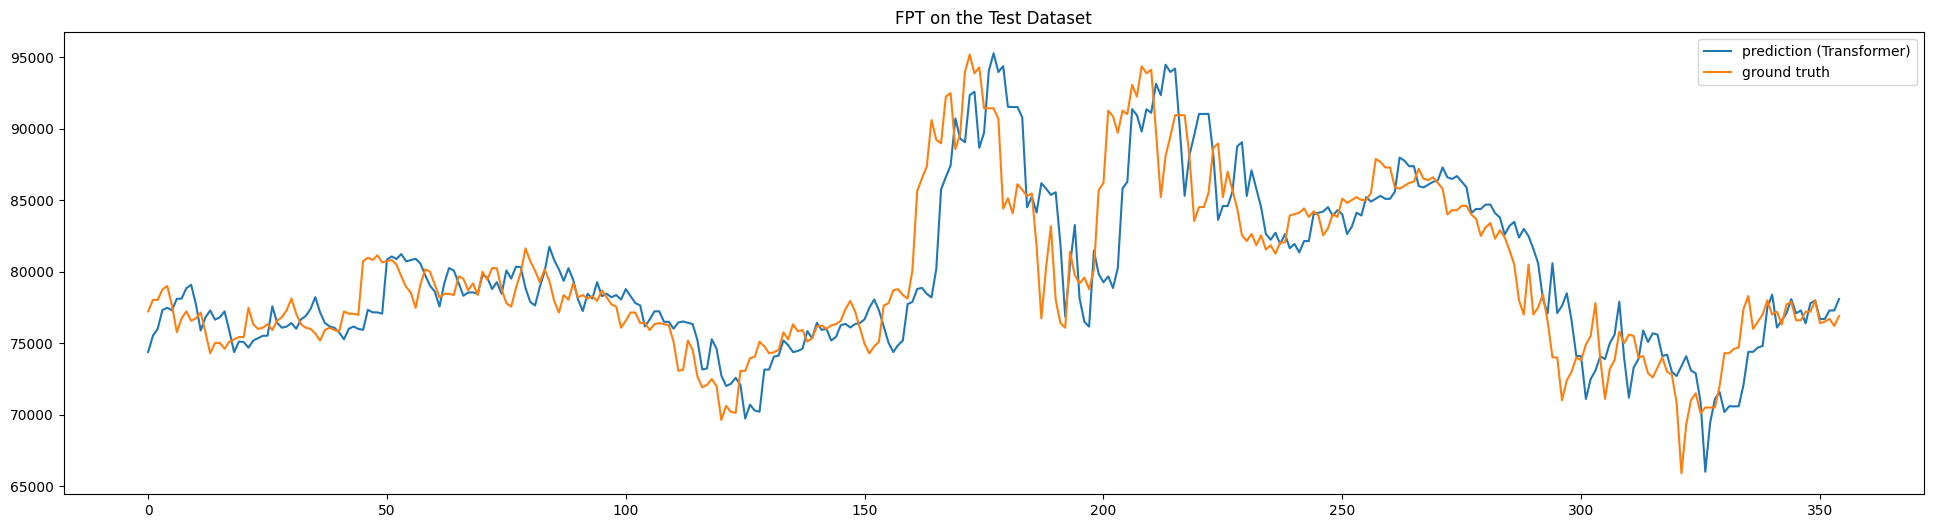

In [338]:
plt.figure(figsize=(24,6))
plt.plot(p3[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["prediction (Transformer)", "ground truth"])
plt.title('FPT on the Test Dataset')

Text(0.5, 1.0, 'FPT on the Test Dataset')

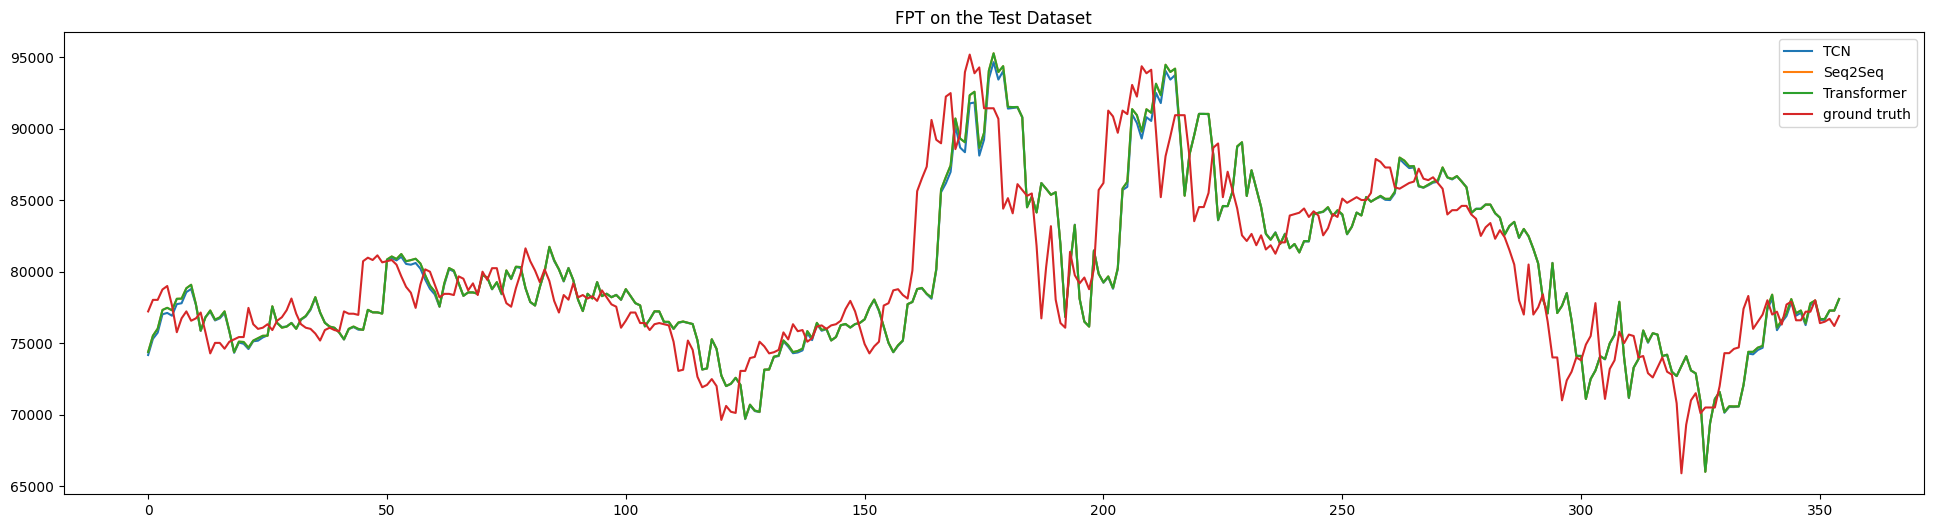

In [339]:
plt.figure(figsize=(24,6))
plt.plot(p[:,:,0][:,-1])
plt.plot(p2[:,:,0][:,-1])
plt.plot(p3[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["TCN", "Seq2Seq", "Transformer", "ground truth"])
plt.title('FPT on the Test Dataset')